# Objective
For this project, I want to explore user review data from TripAdvisor and use clustering techniques to group users based on their preferences for different types of destinations. My goal is to build a recommendation function that determines whether one user's favorite destinations would be a good fit for another user based on their cluster.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("tripadvisor_review.csv")
data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


In [3]:
data.describe()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.893194,1.352612,1.013306,0.532500,0.939735,1.842898,3.180939,2.835061,1.569439,2.799224
std,0.326912,0.478280,0.788607,0.279731,0.437430,0.539538,0.007824,0.137505,0.364629,0.321380
min,0.340000,0.000000,0.130000,0.150000,0.060000,0.140000,3.160000,2.420000,0.740000,2.140000
25%,0.670000,1.080000,0.270000,0.410000,0.640000,1.460000,3.180000,2.740000,1.310000,2.540000
50%,0.830000,1.280000,0.820000,0.500000,0.900000,1.800000,3.180000,2.820000,1.540000,2.780000
75%,1.020000,1.560000,1.572500,0.580000,1.200000,2.200000,3.180000,2.910000,1.760000,3.040000
max,3.220000,3.640000,3.620000,3.440000,3.300000,3.760000,3.210000,3.390000,3.170000,3.660000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   User ID      980 non-null    object 
 1   Category 1   980 non-null    float64
 2   Category 2   980 non-null    float64
 3   Category 3   980 non-null    float64
 4   Category 4   980 non-null    float64
 5   Category 5   980 non-null    float64
 6   Category 6   980 non-null    float64
 7   Category 7   980 non-null    float64
 8   Category 8   980 non-null    float64
 9   Category 9   980 non-null    float64
 10  Category 10  980 non-null    float64
dtypes: float64(10), object(1)
memory usage: 84.3+ KB


In [17]:
X = data.drop('User ID', axis=1)


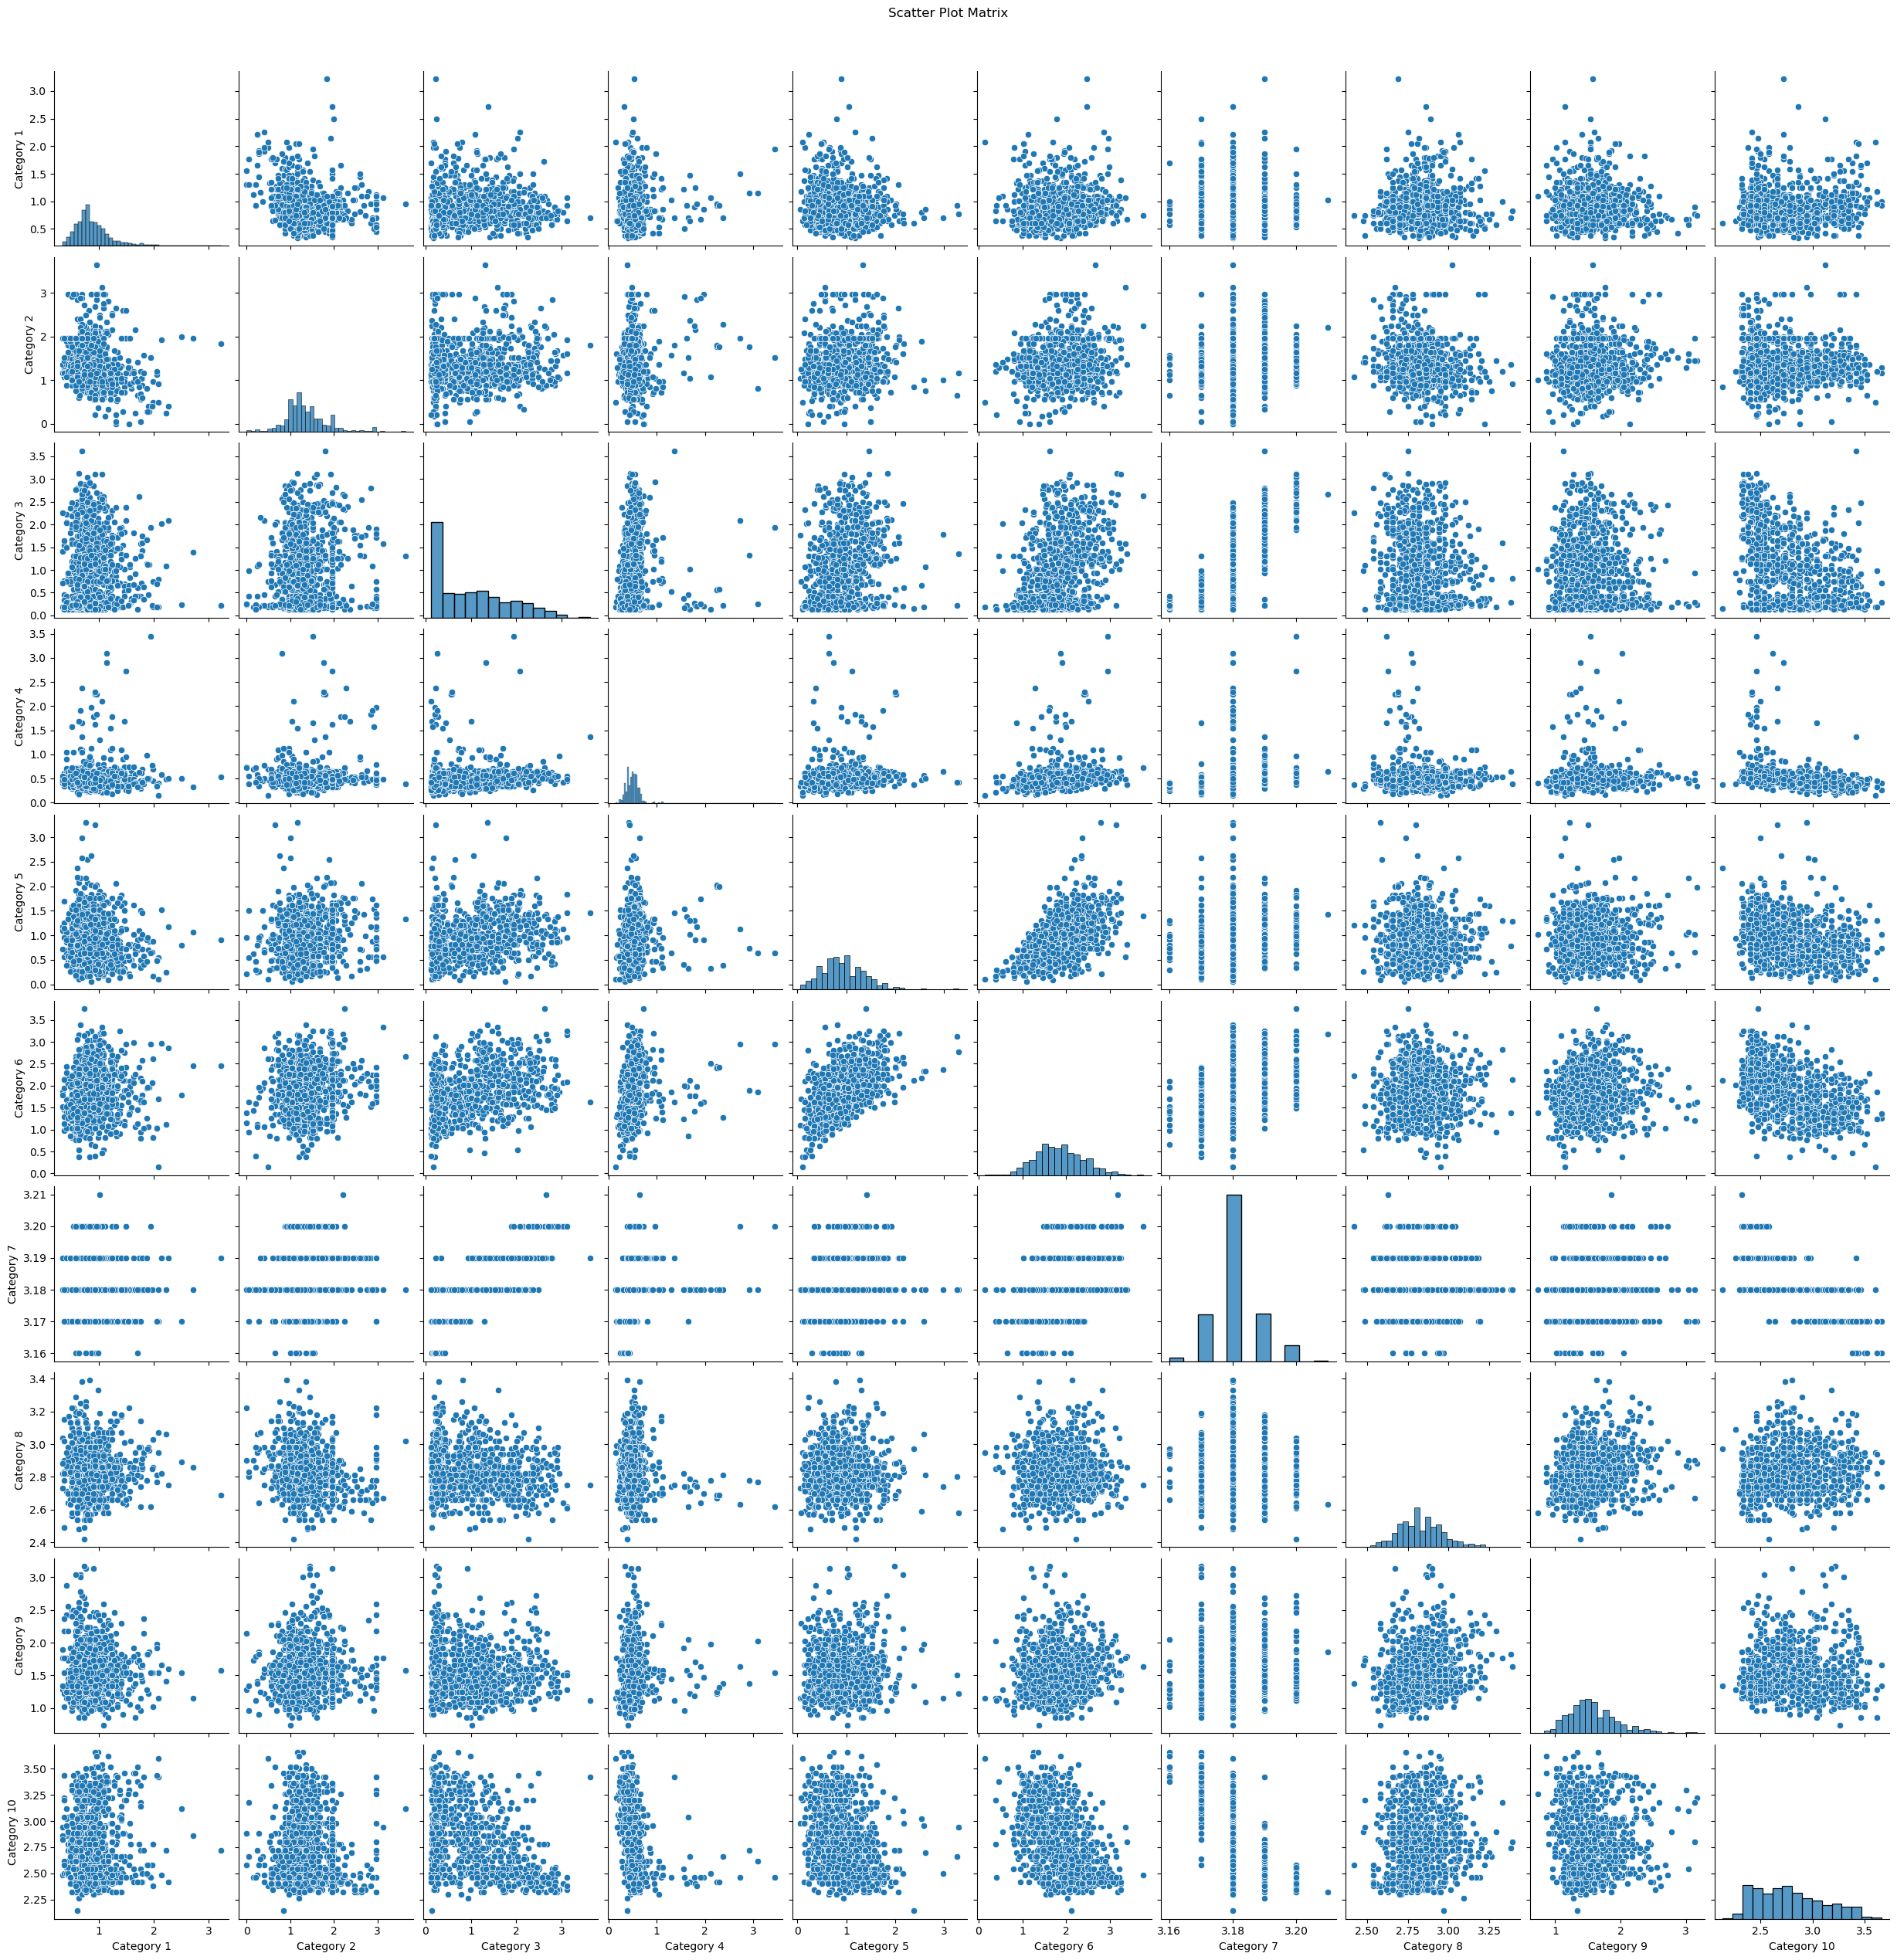

In [42]:
sns.pairplot(X)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

In [ ]:
X.head()

In [ ]:
X_normalized = (X - X.mean()) / X.std()


In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state=42)

In [19]:
kmeans.fit(X)

C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [20]:
pred=kmeans.predict(X)

In [21]:
kmeans.inertia_

890.856008154449

In [23]:
from sklearn import metrics
metrics.silhouette_score(X, kmeans.labels_)

0.1660103130751055

In [24]:
wcss = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++',random_state=101)
    kmeans.fit(X)
    pred=kmeans.predict(X)
    wcss.append(kmeans.inertia_)

C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [25]:
wcss

[1736.1868143877552,
 1179.7601098806288,
 1052.4241425904884,
 961.8174956785639,
 891.0111990768717,
 836.6265970391089,
 793.4462252267551,
 760.6017637977052,
 718.2967369458562,
 687.0672440577998,
 660.7102128294979,
 641.0880126270489,
 625.6440863303686,
 609.5559652000784,
 595.9351398955117,
 579.916352124624,
 569.3900648723597,
 555.0229720143432,
 544.6064573278147]

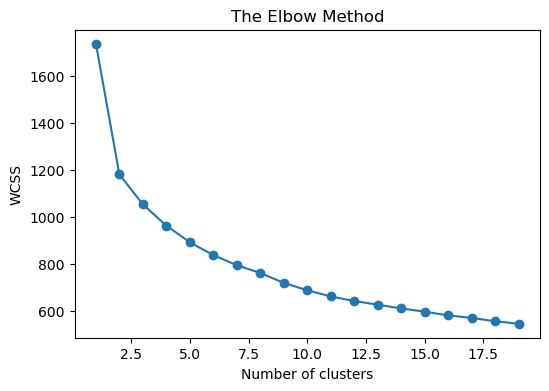

In [26]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 20), wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
s_score = []
for cluster in range(2,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=101)
    kmeans.fit(X)
    pred=kmeans.predict(X)
    s_score.append(metrics.silhouette_score(X, pred))

C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

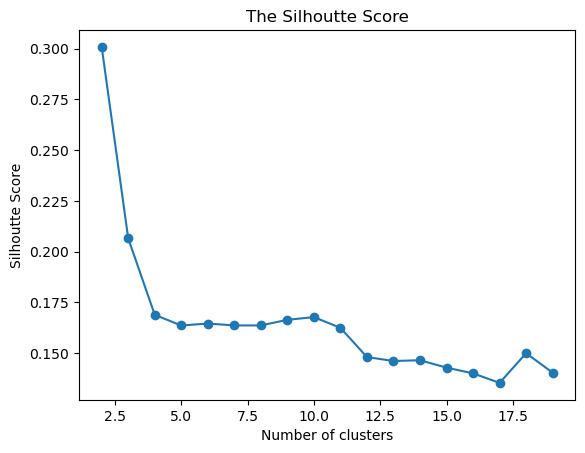

In [30]:
plt.plot(range(2, 20), s_score,marker='o')
plt.title('The Silhoutte Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Score')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)

C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\burha\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [34]:
pred

array([2, 2, 4, 4, 0, 4, 4, 4, 0, 1, 0, 1, 2, 2, 2, 0, 3, 2, 0, 2, 3, 1,
       4, 4, 3, 2, 2, 3, 4, 2, 2, 2, 0, 1, 4, 3, 3, 4, 2, 4, 1, 4, 1, 1,
       1, 4, 4, 3, 1, 2, 1, 2, 0, 3, 4, 4, 2, 3, 2, 0, 2, 4, 4, 4, 3, 4,
       3, 4, 3, 4, 4, 2, 1, 2, 3, 0, 3, 2, 4, 1, 3, 3, 4, 3, 3, 4, 4, 4,
       1, 3, 4, 4, 2, 2, 0, 4, 2, 3, 2, 1, 1, 4, 0, 4, 4, 2, 1, 4, 3, 0,
       1, 3, 1, 3, 2, 1, 0, 1, 3, 3, 0, 1, 0, 3, 0, 4, 4, 3, 3, 4, 3, 0,
       0, 0, 1, 1, 3, 3, 1, 4, 1, 4, 1, 4, 1, 1, 1, 2, 1, 0, 3, 1, 4, 1,
       4, 3, 1, 4, 0, 4, 3, 4, 1, 3, 3, 4, 2, 1, 2, 3, 1, 4, 4, 4, 3, 1,
       3, 3, 1, 4, 4, 0, 3, 3, 2, 1, 1, 4, 0, 4, 2, 2, 4, 1, 1, 4, 3, 2,
       4, 1, 2, 1, 2, 4, 3, 4, 1, 4, 3, 3, 3, 2, 1, 4, 4, 0, 4, 4, 0, 2,
       1, 3, 2, 4, 0, 4, 1, 3, 1, 2, 4, 2, 4, 4, 1, 1, 3, 1, 3, 4, 2, 0,
       4, 4, 4, 3, 4, 0, 4, 1, 3, 4, 2, 2, 4, 1, 4, 1, 3, 0, 3, 0, 4, 0,
       4, 0, 2, 0, 1, 0, 1, 3, 2, 2, 0, 4, 3, 1, 4, 1, 3, 3, 2, 0, 1, 4,
       0, 1, 3, 1, 2, 4, 4, 4, 4, 3, 4, 3, 3, 1, 4,

In [36]:
data['cluster'] = pred

In [38]:
data.head()

,User ID,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,cluster
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,2
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,2
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,4
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,4
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,0


In [39]:
data['cluster'].value_counts()

4    290
1    195
3    186
2    156
0    153
Name: cluster, dtype: int64

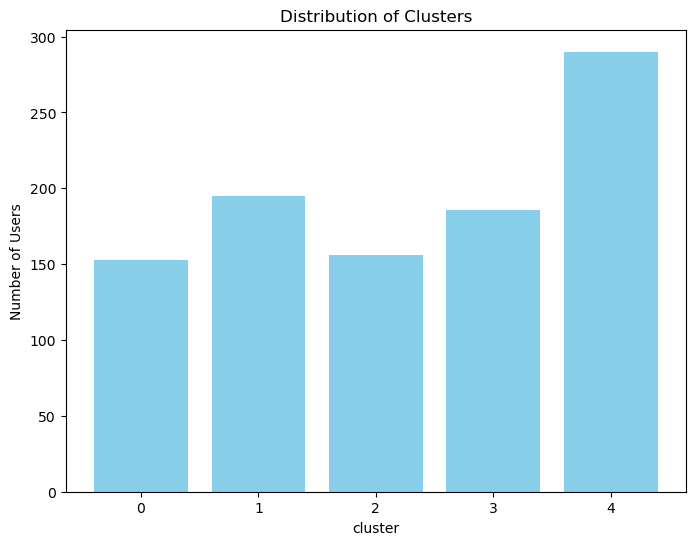

In [48]:
cluster_counts = data['cluster'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('cluster')
plt.ylabel('Number of Users')
plt.title('Distribution of Clusters')
plt.xticks(cluster_counts.index)
plt.show()

# conclusion 
For User 8
check if User 8 and User 28 belong to the same cluster. If they do, it implies they have similar preferences according to the clustering algorithm. If they are in the same cluster, we recommend destinations linked by User 28 to User 8. Otherwise, we do not recommend.
For User 11:
compare User 11 with User 16 and User 28.
The recommendation function compares the clusters to determine similarity in preferences between two users. If they belong to the same cluster, it suggests that they have similar preferences, hence it is better to suggest destinations liked by one user to the other. Otherwise, it is not recommended.